In [1]:
from math import comb
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 
import os
import pandas as pd

import sys
sys.path.append("../../swag_modified/swag")
from utils import compute_outer_fence_mean_standard_deviation

In [2]:
figdir="./figures_NGB_medians"
if not os.path.exists(figdir):
    os.makedirs(figdir)
    
data_path = "../uuss_data/p_resampled"

In [3]:
def load_model_results(file_name):
    file = np.load(file_name)
    predictions = file["predictions"]
    targets = file["targets"][:, 0]
    pred_mean = file["prediction_mean"]
    pred_std = file["prediction_std"]
    resids = targets - pred_mean

    return predictions, pred_mean, pred_std, targets, resids

In [4]:
pwd

'/home/armstrong/Research/git_repos/patprob/no_duplicates/p_ensemble'

In [5]:
ls

calibrated_regression_p_epoch60_N40.ipynb
calibrated_regression_p_loop_epochs.ipynb
calibrated_regression_p_loop_N.ipynb
ensemble_results_NGB.ipynb
ensemble_results_test.ipynb
eval_swag_picker.sh*
figures/
figures_median/
figures_NGB/
figures_NGB_medians/
old/
out.eval_62_N50
out.eval_additional
out.eval_additional_validation
out.eval_ensemble_NGB
out.eval_ensemble_test_fh
out.eval_ensemble_validation
out.eval_N_100
out.eval_new_ensembles_over_epochs
out.eval_over_splits_N40
out.train_ensemble
out.train_ensemble_more_iterations
out.train_more_epochs
p_calibration_model.joblib
p_calibration_model_medians.joblib
seed1_128_0.0005_5e-3_0.0002_75_25_20/
seed2_128_0.0005_5e-3_0.0002_75_25_20/
seed3_128_0.0005_5e-3_0.0002_75_25_20/
selected_models/
train_swag_picker_resume.sh*
train_swag_picker.sh*


In [6]:
model1_file = "seed1_128_0.0005_5e-3_0.0002_75_25_20/eval_40/swag_NGB_uncertainty_60.npz"
model2_file = "seed2_128_0.0005_5e-3_0.0002_75_25_20/eval_40/swag_NGB_uncertainty_60.npz"
model3_file = "seed3_128_0.0005_5e-3_0.0002_75_25_20/eval_40/swag_NGB_uncertainty_60.npz"

model1_preds, model1_pred_mean, model1_pred_std, model1_targets, model1_resids = load_model_results(model1_file)
model2_preds, model2_pred_mean, model2_pred_std, model2_targets, model2_resids = load_model_results(model2_file)
model3_preds, model3_pred_mean, model3_pred_std, model3_targets, model3_resids = load_model_results(model3_file)

In [7]:
combined_predictions = np.concatenate([model1_preds, model2_preds, model3_preds], axis=1)
combined_means = np.mean(combined_predictions, axis=1)
combined_stds = np.std(combined_predictions, axis=1)
assert np.array_equal(model1_targets, model2_targets)
assert np.array_equal(model1_targets, model3_targets)
combined_residuals = model1_targets - combined_means

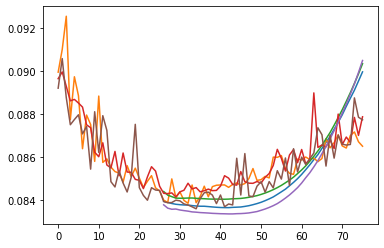

In [8]:
for seed in [1, 2, 3]:
    filename = f"seed{seed}_128_0.0005_5e-3_0.0002_75_25_20/train_metrics.csv"
    df = pd.read_csv(filename)
    plt.plot(np.arange(len(df)), df.swa_va_rms)
    plt.plot(np.arange(len(df)), df.va_rms)

In [9]:
compute_outer_fence_mean_standard_deviation((model1_targets - np.median(combined_predictions, axis=1)))

(0.008357287907069418, 0.03219653747980187)

(0.007812819699044253, 0.034630383085246234)
(0.007865923529822808, 0.03487660919944993)
(0.008921276773908592, 0.03430543887270746)
(0.008300974869063692, 0.03309484938614026)


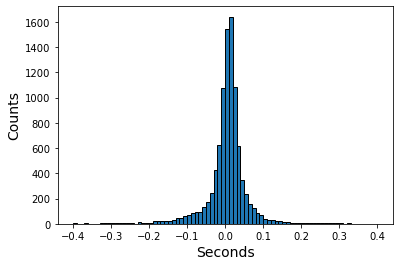

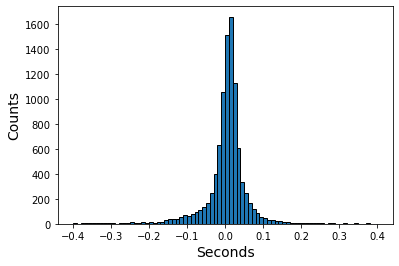

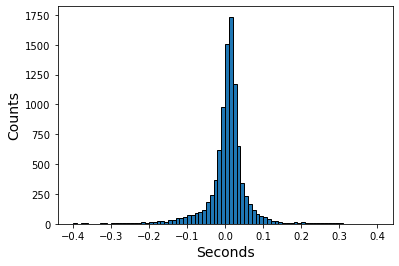

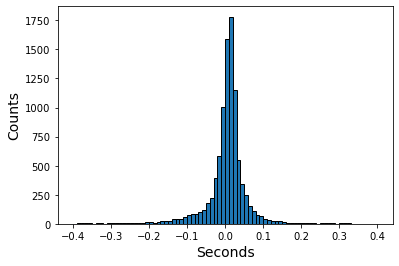

In [10]:
plt.figure()
plt.hist(model1_resids, bins=np.arange(-0.4, 0.41, 0.01), edgecolor="k" );
plt.ylabel("Counts", fontsize=14)
plt.xlabel("Seconds", fontsize=14)
#%%
plt.figure()
plt.hist(model2_resids, bins=np.arange(-0.4, 0.41, 0.01), edgecolor="k" );
plt.ylabel("Counts", fontsize=14)
plt.xlabel("Seconds", fontsize=14)
plt.figure()
plt.hist(model3_resids, bins=np.arange(-0.4, 0.41, 0.01), edgecolor="k" );
plt.ylabel("Counts", fontsize=14)
plt.xlabel("Seconds", fontsize=14)

plt.figure()
plt.hist(combined_residuals, bins=np.arange(-0.4, 0.41, 0.01), edgecolor="k" );
plt.ylabel("Counts", fontsize=14)
plt.xlabel("Seconds", fontsize=14)
#%%
print(compute_outer_fence_mean_standard_deviation(model1_resids))
print(compute_outer_fence_mean_standard_deviation(model2_resids))
print(compute_outer_fence_mean_standard_deviation(model3_resids))
print(compute_outer_fence_mean_standard_deviation(combined_residuals))


(0.008357287907069418, 0.03219653747980187)


Text(0.5, 0, 'Seconds')

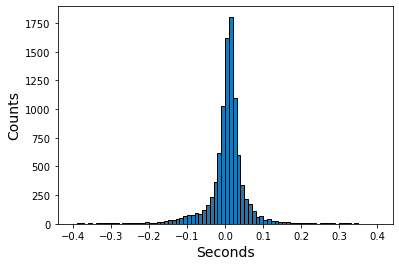

In [11]:
predictions_median = np.median(combined_predictions, axis=1)
print(compute_outer_fence_mean_standard_deviation((model1_targets - predictions_median)))
plt.hist((model1_targets - predictions_median), bins=np.arange(-0.4, 0.41, 0.01), edgecolor="k" );
plt.ylabel("Counts", fontsize=14)
plt.xlabel("Seconds", fontsize=14)

In [12]:
print(np.min(combined_residuals))
print(np.max(combined_residuals))

-0.9114501350248854
0.46931880693009587


In [13]:
import h5py
f = h5py.File(f"{data_path}/uuss_NGB_4s_1dup.h5", "r")
X = f["X"][:]
Y = f["Y"][:]
f.close()


import pandas as pd
meta_df = pd.read_csv(f"{data_path}/uuss_NGB.csv")

In [14]:
wf_len = X.shape[1]
wf_center = wf_len//2

In [15]:
from joblib import load
#s_cal = load('p_calibration_model.joblib')
s_cal = load('p_calibration_model_medians.joblib')

lb = 0.05
ub = 0.95

# Transform the lower and upper bounds to be calibrated
lb_transform = s_cal.transform([lb])[0]
ub_transform = s_cal.transform([ub])[0]

# Compute the lower and upper bounds for each prediction given the mean and std
# test_df["lb_y"] = test_df.apply(lambda x: norm.ppf(lb_transform, x["y_pred"], x["std"]), axis=1)
# test_df["ub_y"] = test_df.apply(lambda x: norm.ppf(ub_transform, x["y_pred"], x["std"]), axis=1)

In [16]:
#combined_df = pd.DataFrame([combined_means, combined_stds]).transpose()
combined_df = pd.DataFrame([predictions_median, combined_stds]).transpose()

combined_df.columns = ["y_pred", "std"]
combined_df.head()

,y_pred,std
0,0.337365,0.051979
1,0.210255,0.036436
2,0.316888,0.055086
3,0.403655,0.068187
4,0.257012,0.042087


In [17]:
from scipy.stats import norm 
combined_df["lb_y"] = combined_df.apply(lambda x: norm.ppf(lb_transform, x["y_pred"], x["std"]), axis=1)
combined_df["ub_y"] = combined_df.apply(lambda x: norm.ppf(ub_transform, x["y_pred"], x["std"]), axis=1)

In [18]:
combined_df.loc[:, "y_act"] = model1_targets

In [19]:
combined_df.head()

,y_pred,std,lb_y,ub_y,y_act
0,0.337365,0.051979,0.190400,0.477878,0.32
1,0.210255,0.036436,0.107237,0.308750,0.20
2,0.316888,0.055086,0.161138,0.465799,0.43
3,0.403655,0.068187,0.210866,0.587980,0.45
4,0.257012,0.042087,0.138016,0.370783,0.18


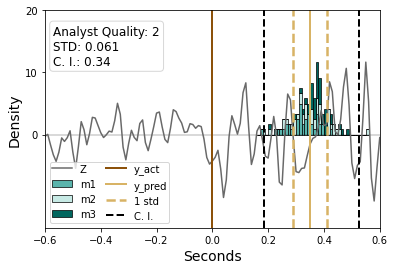

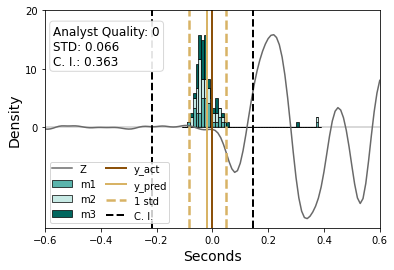

In [23]:
quality_map = {1.0:0, 0.75:1, 0.5:2}
for i in [85, 97]:
    shift = model1_targets[i]
    shifted_predictions = combined_predictions[i, :]-shift
    shifted_m1_preds = model1_preds[i, :] - shift
    shifted_m2_preds = model2_preds[i, :] - shift
    shifted_m3_preds = model3_preds[i, :] - shift

    shifted_pick = combined_means[i]-shift
    std = combined_stds[i]
    quality = quality_map[meta_df.iloc[i].pick_quality]
    fig, ax = plt.subplots(1)

    ## Horizontal line at 0
    ax.axhline(0, alpha=0.2, color="k")

    ## Prediction histogram
    #bins = ax.hist(shifted_predictions, bins=30, density=True, alpha=0.7)
    bins = np.arange(round(np.min(shifted_predictions)-0.02, 2), round(np.max(shifted_predictions)+0.02, 2), 0.01)
    bins = ax.hist([shifted_m1_preds, shifted_m2_preds, shifted_m3_preds], bins=bins, stacked=True, density = True, 
                   alpha=1.0, edgecolor="black", linewidth=0.7, label=["m1", "m2", "m3"], 
                   color=["#5ab4ac", "#c7eae5", "#01665e"])
                   #color=["#ffffcc", "#2c7fb8", "#41b6c4"])
                   #color=["#EA5F94", "#FA8775", "#FFB14E"])
                   #color=["#D81B60", "#1E88E5", "#FFC107"])
    
    lb_y = combined_df.iloc[i]["lb_y"] - shift
    ub_y = combined_df.iloc[i]["ub_y"] - shift
    
    ## Trim and scale waveform
    max_dens = np.max(bins[0])
    #     width = round(np.max(abs(shifted_predictions)) + 0.1, 2)
    #width = round(np.max([np.max(abs(shifted_predictions)) + 0.1, abs(lb_y), abs(ub_y)]), 2)
    width=0.6
    wf_width = round(width*100)
    pick_loc = wf_center + int(Y[i]*100)
    wf = (X[i, pick_loc-wf_width:pick_loc+wf_width+1])
    # wf_norm = np.array(max_dens)/np.max(abs(wf), axis=0)
    wf_norm = max_dens/np.max(abs(wf))

    ## Plot waveform
    x_vals = np.arange(-width, round(width+0.01, 2), 0.01)
    ax.plot(x_vals[:len(wf)], wf*wf_norm, color="dimgray", label="Z")
#     ax.plot(x_vals[:len(wf)], wf[:, 1]*wf_norm[1], color="slategray", label="N")
#     ax.plot(x_vals[:len(wf)], wf[:, 2]*wf_norm[2], color="darkgray", label="Z")

    ## Plot gaussion over predictions

#     hist_range = np.zeros(len(bins[1])+2)
#     hist_range[0] = bins[1][0] - 0.01
#     hist_range[-1] = bins[1][-1] + 0.01
#     hist_range[1:-1] = bins[1]
    #ax.plot(hist_range, norm.pdf(hist_range, shifted_pick, std), color="r")
    #ax.axvline(shifted_pick - std, linestyle=(5, (10, 3)), ymin=0.5, color="k", label="1 std")
    #ax.axvline(shifted_pick + std, linestyle=(5, (10, 3)), color="k")
    
    ## Plot calibrated upper and lower bounds
    ax.axvline(lb_y, color="k", linestyle="--", linewidth=2)
    ax.axvline(ub_y, color="k", linestyle="--", linewidth=2, label="C. I.")
    
    ## Only plot positive density ticks
    ax.set_yticks(np.arange(0, max_dens+10, 10))
    
    ## Plot STD and Pick Quality Information
    ax.text(0.025, 0.75, f"Analyst Quality: {quality}\nSTD: {str(round(std, 3))}\nC. I.: {str(round(ub_y-lb_y, 3))}", transform=ax.transAxes, fontsize=12, 
           bbox=dict(facecolor='white', alpha=0.9, edgecolor="lightgrey", boxstyle="round"))
    
    ## Set X & Y labels
    ax.set_ylabel("Density", fontsize=14)
    ax.set_xlabel("Seconds", fontsize=14)
    
    ## Only plot STD lines for positive density
    ylim = ax.get_ylim()
#     ax.vlines(shifted_pick - std, ymin=ylim[0], ymax=ylim[1], linestyle="--", label="1 std", 
#               linewidth=2.5, color="#d8b365") #color="#f6e8c3")
#     ax.vlines(shifted_pick + std, ymin=ylim[0], ymax=ylim[1], linestyle="--", linewidth=2.5, color="#d8b365") # color="#f6e8c3")
    
    ax.axvline(shifted_pick - std, linestyle="--", label="1 std", linewidth=2.5, color="#d8b365") #color="#f6e8c3")
    ax.axvline(shifted_pick + std, linestyle="--", linewidth=2.5, color="#d8b365") # color="#f6e8c3")
   
    ax.set_ylim([np.min([ylim[0], -0.75*ylim[1]]), ylim[1]])
    
    ## Plot picks
    ax.axvline(shifted_pick, label="y_pred", linewidth=2, color="#d8b365")
    ax.axvline(0, label="y_act", linewidth=2, color="#8c510a") #color="#253494")#color="#004D40")
    
    ## Change order of legend to make more sense/look better
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [0,5,6,7,4,3,2,1]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="lower left", ncol=2,
              borderpad=0.2, columnspacing=1.0)
    #ax.legend(loc="lower left", ncol=3)
#     plt.savefig(f"{figdir}/test_wf_{i:02d}.jpg")
#     plt.close()
    plt.xlim([-0.6, 0.6])
    plt.show()
    
#     plt.figure()
#     plt.plot(range(len(x_e)), x_e/np.max(abs(x_e)))
#     plt.plot(range(len(x_n)), x_n/np.max(abs(x_n))-1)
#     plt.plot(range(len(x_t)), x_t/np.max(abs(x_t))-2)

In [31]:
quality_map = {1.0:0, 0.75:1, 0.5:2}
for i in range(0, 1000):
    shift = model1_targets[i]
    shifted_predictions = combined_predictions[i, :]-shift
    shifted_m1_preds = model1_preds[i, :] - shift
    shifted_m2_preds = model2_preds[i, :] - shift
    shifted_m3_preds = model3_preds[i, :] - shift

    #shifted_pick = combined_means[i]-shift
    shifted_pick = predictions_median[i]-shift
    std = combined_stds[i]
    quality = quality_map[meta_df.iloc[i].pick_quality]
    fig, ax = plt.subplots(1)

    ## Horizontal line at 0
    ax.axhline(0, alpha=0.2, color="k")

    ## Prediction histogram
    #bins = ax.hist(shifted_predictions, bins=30, density=True, alpha=0.7)
    bins = np.arange(round(np.min(shifted_predictions)-0.02, 2), round(np.max(shifted_predictions)+0.02, 2), 0.01)
    bins = ax.hist([shifted_m1_preds, shifted_m2_preds, shifted_m3_preds], bins=bins, stacked=True, density = True, 
                   alpha=1.0, edgecolor="black", linewidth=0.7, label=["m1", "m2", "m3"], 
                   color=["#5ab4ac", "#c7eae5", "#01665e"])
                   #color=["#ffffcc", "#2c7fb8", "#41b6c4"])
                   #color=["#EA5F94", "#FA8775", "#FFB14E"])
                   #color=["#D81B60", "#1E88E5", "#FFC107"])
    
    lb_y = combined_df.iloc[i]["lb_y"] - shift
    ub_y = combined_df.iloc[i]["ub_y"] - shift
    
    ## Trim and scale waveform
    max_dens = np.max(bins[0])
    #     width = round(np.max(abs(shifted_predictions)) + 0.1, 2)
    width = round(np.max([np.max(abs(shifted_predictions)) + 0.1, abs(lb_y), abs(ub_y)]), 2)
    wf_width = round(width*100)
    pick_loc = wf_center + int(Y[i]*100)
    wf = (X[i, pick_loc-wf_width:pick_loc+wf_width+1])
    # wf_norm = np.array(max_dens)/np.max(abs(wf), axis=0)
    wf_norm = max_dens/np.max(abs(wf))

    ## Plot waveform
    x_vals = np.arange(-width, round(width+0.01, 2), 0.01)
    ax.plot(x_vals[:len(wf)], wf*wf_norm, color="dimgray", label="Z")
#     ax.plot(x_vals[:len(wf)], wf[:, 1]*wf_norm[1], color="slategray", label="N")
#     ax.plot(x_vals[:len(wf)], wf[:, 2]*wf_norm[2], color="darkgray", label="Z")

    ## Plot gaussion over predictions

#     hist_range = np.zeros(len(bins[1])+2)
#     hist_range[0] = bins[1][0] - 0.01
#     hist_range[-1] = bins[1][-1] + 0.01
#     hist_range[1:-1] = bins[1]
    #ax.plot(hist_range, norm.pdf(hist_range, shifted_pick, std), color="r")
    #ax.axvline(shifted_pick - std, linestyle=(5, (10, 3)), ymin=0.5, color="k", label="1 std")
    #ax.axvline(shifted_pick + std, linestyle=(5, (10, 3)), color="k")
    
    ## Plot calibrated upper and lower bounds
    ax.axvline(lb_y, color="k", linestyle="--", linewidth=2)
    ax.axvline(ub_y, color="k", linestyle="--", linewidth=2, label="C. I.")
    
    ## Only plot positive density ticks
    ax.set_yticks(np.arange(0, max_dens+10, 10))
    
    ## Plot STD and Pick Quality Information
    ax.text(0.025, 0.75, f"Analyst Quality: {quality}\nSTD: {str(round(std, 3))}\nC. I.: {str(round(ub_y-lb_y, 3))}", transform=ax.transAxes, fontsize=12, 
           bbox=dict(facecolor='white', alpha=0.9, edgecolor="lightgrey", boxstyle="round"))
    
    ## Set X & Y labels
    ax.set_ylabel("Density", fontsize=14)
    ax.set_xlabel("Seconds", fontsize=14)
    
    ## Only plot STD lines for positive density
    ylim = ax.get_ylim()
#     ax.vlines(shifted_pick - std, ymin=ylim[0], ymax=ylim[1], linestyle="--", label="1 std", 
#               linewidth=2.5, color="#d8b365") #color="#f6e8c3")
#     ax.vlines(shifted_pick + std, ymin=ylim[0], ymax=ylim[1], linestyle="--", linewidth=2.5, color="#d8b365") # color="#f6e8c3")
    
    ax.axvline(shifted_pick - std, linestyle="--", label="1 std", linewidth=2.5, color="#d8b365") #color="#f6e8c3")
    ax.axvline(shifted_pick + std, linestyle="--", linewidth=2.5, color="#d8b365") # color="#f6e8c3")
   
    ax.set_ylim([np.min([ylim[0], -0.75*ylim[1]]), ylim[1]])
    
    ## Plot picks
    ax.axvline(shifted_pick, label="y_pred", linewidth=2, color="#d8b365")
    ax.axvline(0, label="y_act", linewidth=2, color="#8c510a") #color="#253494")#color="#004D40")
    
    ## Change order of legend to make more sense/look better
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [0,5,6,7,4,3,2,1]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="lower left", ncol=2,
              borderpad=0.2, columnspacing=1.0)
    #ax.legend(loc="lower left", ncol=3)
    plt.savefig(f"{figdir}/NGB_wf_{i:02d}.jpg")
    plt.close()
    #plt.show()
    
#     plt.figure()
#     plt.plot(range(len(x_e)), x_e/np.max(abs(x_e)))
#     plt.plot(range(len(x_n)), x_n/np.max(abs(x_n))-1)
#     plt.plot(range(len(x_t)), x_t/np.max(abs(x_t))-2)

In [32]:
widths = (combined_df.ub_y - combined_df.lb_y)

In [33]:
widths

0       0.287478
1       0.201513
2       0.304661
3       0.377114
4       0.232767
          ...   
9624    0.291775
9625    0.195292
9626    0.416914
9627    0.191928
9628    0.380367
Length: 9629, dtype: float64

4290
3833
1506


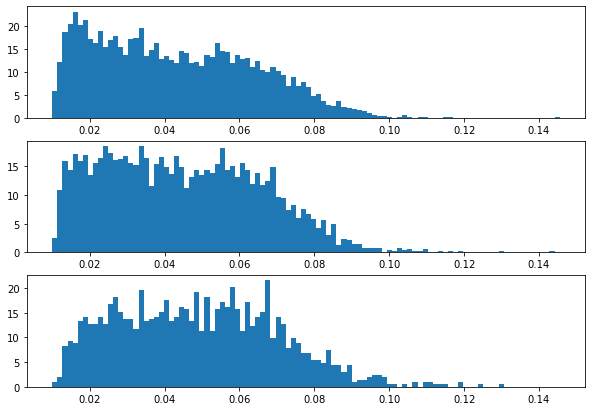

In [34]:
one_inds = meta_df[meta_df["pick_quality"] == 1].index
print(len(one_inds))

two_inds = meta_df[meta_df["pick_quality"] == 0.75].index
print(len(two_inds))

three_inds = meta_df[meta_df["pick_quality"] == 0.5].index
print(len(three_inds))
fig, axes = plt.subplots(3, 1, figsize=(10, 7))
bins = axes[0].hist(combined_stds[one_inds], density=True, bins=100);
bins2 = axes[1].hist(combined_stds[two_inds], density=True, bins=bins[1]);
bins3 = axes[2].hist(combined_stds[three_inds], density=True, bins=bins[1]);

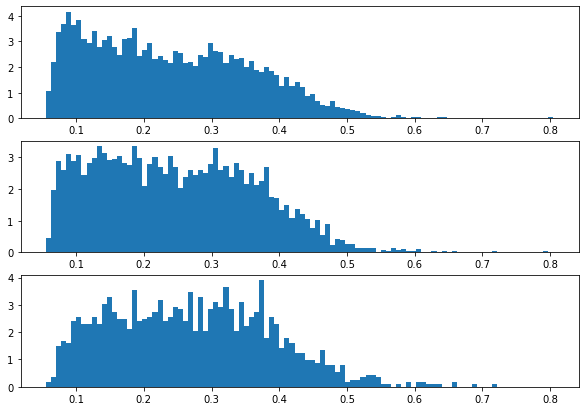

In [35]:
fig, axes = plt.subplots(3, 1, figsize=(10, 7))
bins = axes[0].hist(widths[one_inds], density=True, bins=100);
bins2 = axes[1].hist(widths[two_inds], density=True, bins=bins[1]);
bins3 = axes[2].hist(widths[three_inds], density=True, bins=bins[1]);

In [36]:
((combined_df["y_act"] > combined_df["lb_y"]) & (combined_df["y_act"] < combined_df["ub_y"])).sum()/len(combined_df)

0.9413230865095026